In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/spam (2).tsv', sep = '\t')

In [3]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
data.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
#SEEING ONLY HAM MSGS
data[data['label']=='ham']

In [8]:
#NOW STORE THEM IN DIFFERENT VARIABLE
ham = data[data['label']=='ham']

In [9]:
spam = data[data['label']=='spam']

In [10]:
ham.shape, spam.shape

((4825, 4), (747, 4))

**NOW BALANCING HAM AND SPAM**

In [11]:
ham = ham.sample(spam.shape[0])

In [12]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [13]:
dataset = ham.append(spam, ignore_index= True)

<ipython-input-13-8cb9d581d7bb>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = ham.append(spam, ignore_index= True)


In [14]:
dataset.shape

(1494, 4)

In [ ]:
dataset

**DATA VISUALIZATION**

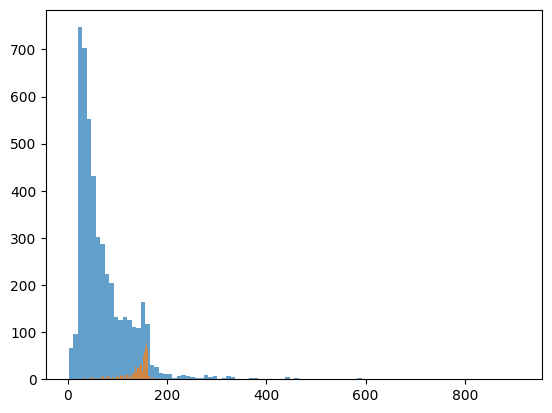

In [16]:
plt.hist(data[data['label']=='ham'] ['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam'] ['length'], bins = 100, alpha = 0.7)
plt.show()

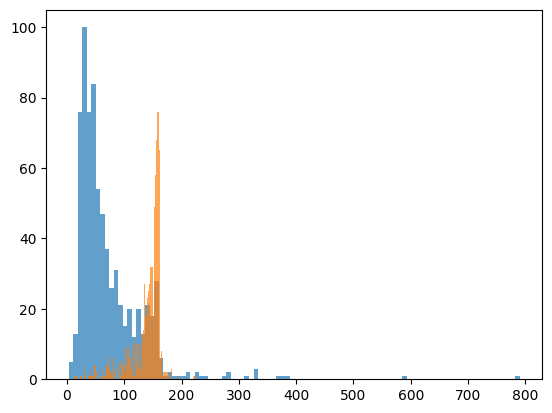

In [17]:
#NOW TRYING THIS IN BALANCED DATA
plt.hist(dataset[dataset['label']=='ham'] ['length'], bins = 100, alpha = 0.7)
plt.hist(dataset[dataset['label']=='spam'] ['length'], bins = 100, alpha = 0.7)
plt.show()

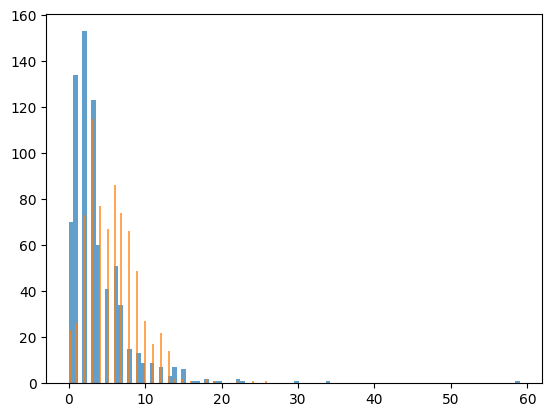

In [18]:
plt.hist(dataset[dataset['label']=='ham'] ['punct'], bins = 100, alpha = 0.7)
plt.hist(dataset[dataset['label']=='spam'] ['punct'], bins = 100, alpha = 0.7)
plt.show()

**Splitting the dataset**

In [19]:
x= dataset['message']
y= dataset['label']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y , test_size = 0.3, random_state = 0, shuffle = True)

# **RANDOM FOREST MODEL**

TO CONVERT MESSAGES INTO TEXTUAL DATA

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators = 10))])

In [25]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

# Predicting the result

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', '

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [29]:
accuracy_score(y_test, y_pred)

0.9153674832962138

In [30]:
confusion_matrix(y_test,y_pred)

array([[224,   3],
       [ 35, 187]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.86      0.99      0.92       227
        spam       0.98      0.84      0.91       222

    accuracy                           0.92       449
   macro avg       0.92      0.91      0.91       449
weighted avg       0.92      0.92      0.91       449



# **SVM MODEL**

In [33]:
from sklearn.svm import SVC

In [35]:
svm = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', SVC(C =100, gamma = 'auto'))])

In [36]:
svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# Predicting the result

In [37]:
y_pred = svm.predict(x_test)

In [38]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [39]:
confusion_matrix(y_test, y_pred)

array([[222,   5],
       [ 16, 206]])

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.95       227
        spam       0.98      0.93      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



# **NOW TESTING OUR MODEL**

In [45]:
test1= ['hello, you are leaning NLP.']
test2= ["Yes, I'll reach by 10p.m." ]
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [46]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
